 # Resampling Data
## Resampling means taking our data from one granularity to a different granularity
## Such as changing daily to weekly/monthly/annual granularity

In [2]:
from matplotlib import dates # to load dates library from matplotlib
import matplotlib.pyplot as plt # to import general matplotlib plotting library
import numpy as np # numPy
import pandas as pd # pandas
import yfinance as yf # Yfinance

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
raw

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] # using a list comprehension to extract the first entry for each tuple in 
                                        # the multi-index from .columns ^above^
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.505279,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.516528,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.412873,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.401019,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.443574,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.451065,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.517090,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.896324,72.477501,72.495003,71.175003,71.205002,93121200


In [3]:
import yfinance as yf
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] 
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
                    
    return(raw
     .iloc[:, :-2:2] # :-2:2 takes out volume, ::2 leaves volume in
     .pipe(fix_cols)
)
                      
tweak_data()

[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open
Date,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500
2010-01-05,6.516527,7.656429,7.699643,7.616071,7.664286
2010-01-06,6.412873,7.534643,7.686786,7.526786,7.656429
2010-01-07,6.401017,7.520714,7.571429,7.466071,7.562500
2010-01-08,6.443574,7.570714,7.571429,7.466429,7.510714
...,...,...,...,...,...
2019-12-23,69.451065,71.000000,71.062500,70.092499,70.132500
2019-12-24,69.517097,71.067497,71.222504,70.730003,71.172501
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002


## Starting Resampling


<AxesSubplot:xlabel='Date'>

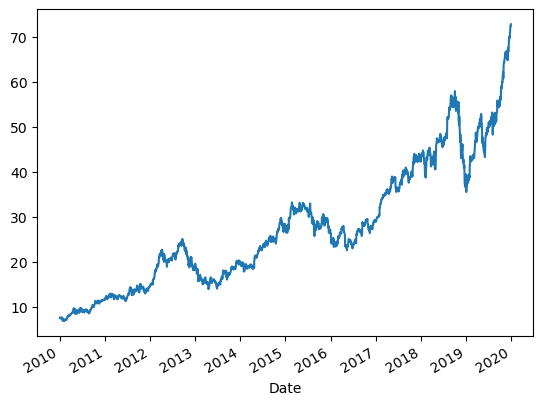

In [4]:
(raw
.iloc[:, :-2:2]
.pipe(fix_cols)
.Close
.plot()
)

# Close value of Apple on a daily basis from 2010 to 2020

In [5]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
)

# Each row is a single daily value

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [8]:
# To get the monthly data, as opposed to daily

(raw
 .iloc[:, ::2] # Taking every other column to obtain AAPL data
 .pipe(fix_cols) # calling fix_cols function to collapse hierarchical columns
 .resample('M') # offset alias. In this case 'M' means monthly
 .Close
)

# Notice it wont return anything very useful

In [9]:
# you must call an aggregation method

(raw
 .iloc[:, ::2] # Taking every other column to obtain AAPL data
 .pipe(fix_cols) # calling fix_cols function to collapse hierarchical columns
 .resample('M') # offset alias. In this case 'M' means monthly... every 2 months= '2M'
                # quarterly = 'Q'
 .Close
 .mean()
)

# Will return the average, or, mean closing values for each of the months

Date
2010-01-31     7.418402
2010-02-28     7.099850
2010-03-31     7.978960
2010-04-30     8.969592
2010-05-31     8.980768
                ...    
2019-08-31    51.239432
2019-09-30    54.498750
2019-10-31    58.821630
2019-11-30    65.630126
2019-12-31    68.917374
Freq: M, Name: Close, Length: 120, dtype: float64

<AxesSubplot:xlabel='Date'>

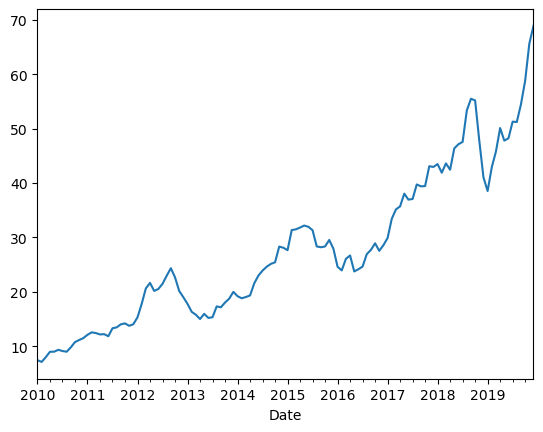

In [10]:
(raw
 .iloc[:, ::2] # Taking every other column to obtain AAPL data
 .pipe(fix_cols) # calling fix_cols function to collapse hierarchical columns
 .resample('M') # offset alias. In this case 'M' means monthly
 .Close
 .mean() # used as an aggregation method (for the actual values to be plotted)(avg monthly close every month)
 .plot()
)